##Setup

In [1]:
%matplotlib inline

/usr/local/python-2.7.6/lib/python2.7/site-packages/matplotlib-1.5.1-py2.7-linux-x86_64.egg/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/python-2.7.6/lib/python2.7/site-packages/matplotlib-1.5.1-py2.7-linux-x86_64.egg/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import thunder
from showit import image, tile
import matplotlib.animation as animation

In [4]:
from os.path import join, exists
from os import mkdir, makedirs

In [5]:
from numpy import save

In [6]:
from skimage.io import imsave

In [7]:
def normalize(oim):
    # normalizes 3D image across first axis
    assert oim.ndim == 3
    
    means = oim.mean(axis=(1, 2), dtype='float32')
    maximum = means.max()
    return array([oim[i]*maximum/means[i] for i in range(oim.shape[0])])

##Set directory and session information

In [8]:
directory = '/tier2/freeman/Nick/lfov.calibration'

In [9]:
key = '2016-04-18-long'
name = 'anm-0330549'

In [10]:
path = join(directory, 'reprocessed', name, key)
print exists(path)

True


##Create savepath

In [11]:
savepath = join(directory, 'reprocessed', name, key, 'summary')
if not exists(savepath):
    makedirs(savepath)

##Load data

In [13]:
data = thunder.images.frombinary(join(path, 'images'), engine=sc)

In [14]:
data.cache();

##Mean image

In [15]:
mean = data.mean().toarray().astype('float32')

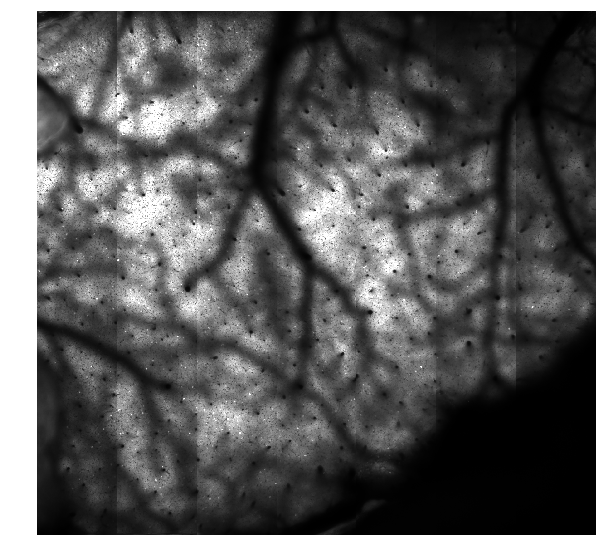

In [16]:
img = mean[:,:]
fig = plt.figure(figsize=[10,10])
ax = plt.axes()
im = image(img, clim=(0, 3.5*img.mean()), ax=ax)

In [17]:
imsave(savepath+'/mean.tif', mean, plugin='tifffile', photometric='minisblack')
#imsave(savepath+'/mean-norm.tif', normalize(mean), plugin='tifffile', photometric='minisblack')

##Standard deviation image

In [19]:
std = data.std().toarray().astype('float32')

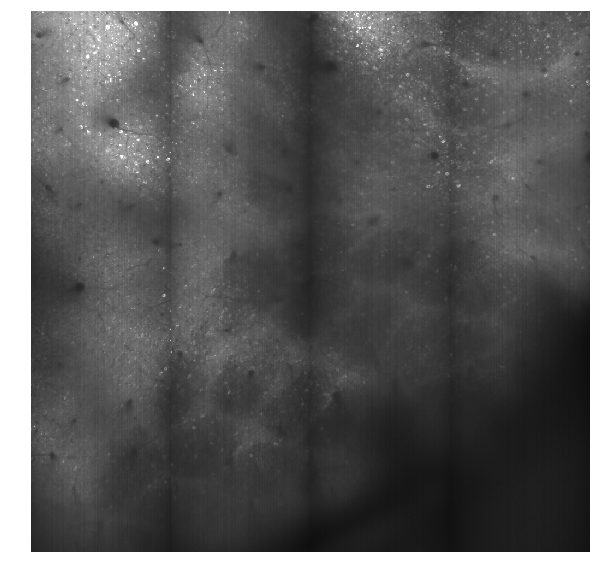

In [20]:
img = std[:,:]
fig = plt.figure(figsize=[10,10])
ax = plt.axes()
im = image(img, clim=(0, 3.5*img.mean()), ax=ax)

In [21]:
imsave(savepath+'/std.tif', std, plugin='tifffile', photometric='minisblack')
#imsave(savepath+'/std-norm.tif', normalize(std), plugin='tifffile', photometric='minisblack')

###maximum image

In [22]:
maximum = data.max().toarray().astype('float32')

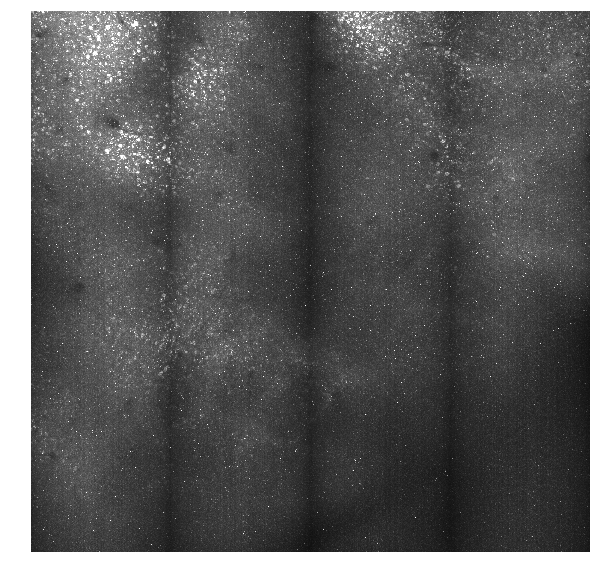

In [23]:
img = maximum[:,:]
fig = plt.figure(figsize=[10,10])
ax = plt.axes()
im = image(img, clim=(0, 3.5*img.mean()), ax=ax)

In [24]:
imsave(savepath+'/maximum.tif', maximum, plugin='tifffile', photometric='minisblack')
#imsave(savepath+'/maximum-norm.tif', normalize(maximum), plugin='tifffile', photometric='minisblack')

###local corr image

In [25]:
data.shape

(14607, 992, 1024)

In [26]:
localcorr = data.localcorr((4, 4)).astype('float32')

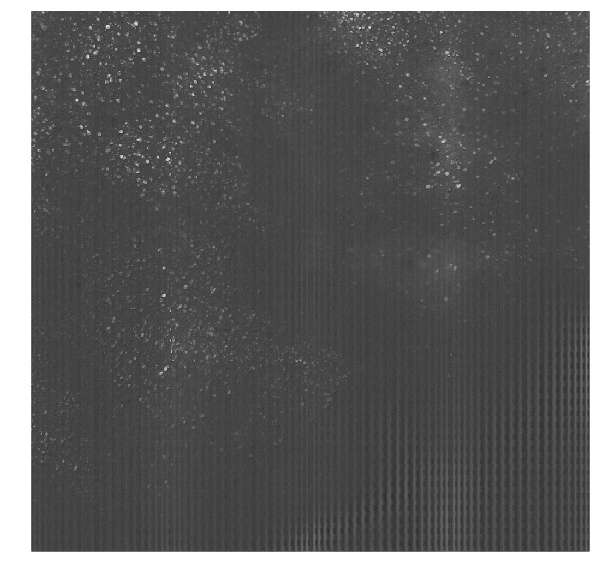

In [27]:
img = localcorr[:,:]
fig = plt.figure(figsize=[10,10])
ax = plt.axes()
im = image(img, clim=(0, 3.5*img.mean()), ax=ax)

In [28]:
imsave(savepath+'/localcorr.tif', localcorr, plugin='tifffile', photometric='minisblack')
#imsave(savepath+'/localcorr-norm.tif', normalize(localcorr), plugin='tifffile', photometric='minisblack')